In [108]:
import pandas as pd
import matplotlib.pyplot as plt
# Dependencies
import requests
from pprint import pprint
import numpy as np
import gmaps
import json
import os
from scipy.stats import linregress
from datetime import datetime
import time

# Google developer API key
#from config import g_key

In [109]:
deforest_df = pd.read_csv("csv_files/total_deforestation_data.csv")
tot_rainfall_df=pd.read_csv('csv_files/total_rainfall_by_year_by_state.csv')

#deforest_df=deforest_df.drop("Grand Total", axis =1)
deforest_df=deforest_df.rename(columns={"Grand Total": "Total_Deforested_km2"})

tot_rain=tot_rainfall_df.drop(["Unnamed: 0"], axis =1)

trp=tot_rain.pivot_table(values="rain_sum", index="Year", columns="State")
trp=trp.fillna(0)

trp["Total_Rain_mm"]= trp.AC+trp.AM+trp.AP+trp.MA+trp.MT+trp.PA+trp.RR+trp.TO

trp=trp.rename(columns={"AC":"AC_mm", "AM":"AM_mm","AP":"AP_mm","MA":"MA_mm","MT":"MT_mm","PA":"PA_mm","RR":"RR_mm","TO":"TO_mm"})
trp=trp.loc[1997:2019]
trp.to_csv("useable_csv/rainfall_data.csv")

deforest_df=deforest_df.reindex(columns=['Year','AC_km2','AM_km2','AP_km2','MA_km2','MT_km2','PA_km2','RR_km2','TO_km2','Total_Deforested_km2']).set_index("Year")

deforest_df=deforest_df.loc[1997:2019]

deforest_df.to_csv("useable_csv/deforestation_data.csv")
trp

State,AC_mm,AM_mm,AP_mm,MA_mm,MT_mm,PA_mm,RR_mm,TO_mm,Total_Rain_mm
Year,,,,,,,,,
1997,5870.6,33493.4,2461.7,16402.1,194.6,24574.8,2591.1,10787.7,96376.0
1998,6199.1,33121.6,2275.0,15121.0,14301.0,25480.4,4263.6,8214.4,108976.1
1999,7224.9,39216.4,2707.3,20967.7,13968.1,32186.7,4117.9,10789.9,131178.9
2000,5988.9,38419.4,2701.8,20664.4,15296.2,36950.7,4256.5,11248.4,135526.3
2001,5969.8,36783.6,2113.8,19344.0,16781.4,30855.7,2971.3,9796.4,124616.0
2002,6453.0,39153.4,2488.1,18906.3,14992.1,29565.0,3639.7,9663.7,124861.3
2003,6337.3,34358.7,1921.3,18785.1,17968.0,30020.9,3603.5,9186.1,122180.9
2004,6970.3,29295.7,2701.3,21798.3,18756.2,33637.2,3927.6,10684.8,127771.4
2005,5940.9,31704.6,2591.5,18836.6,16727.6,32960.1,4290.1,10796.5,123847.9


In [110]:
deforest_df

,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
Year,,,,,,,,,
1997,5453,7034,913,6162,29919,32615,2869,4380,102346
1998,5989,7704,943,7174,36385,38444,3092,4956,119729
1999,6430,8424,943,7297,43348,43555,3312,5172,135881
2000,6977,9036,943,8362,49717,50226,3565,5416,154107
2001,7396,9670,950,9320,57420,55463,3910,5605,172272
2002,8279,10555,950,10405,65312,56214,3994,5817,187163
2003,9357,12113,975,11398,75717,63359,4433,5973,212559
2004,10085,13345,1021,12153,87531,64246,4744,6131,232348
2005,10677,14120,1054,13075,94676,70145,4877,6402,251362


In [111]:
cols_deforest=deforest_df.columns.tolist()
cols_deforest

['AC_km2',
 'AM_km2',
 'AP_km2',
 'MA_km2',
 'MT_km2',
 'PA_km2',
 'RR_km2',
 'TO_km2',
 'Total_Deforested_km2']

In [112]:
cols_rain=trp.columns.tolist()

In [113]:
x_axis=deforest_df.index.tolist()
x_axis
deforest_df

,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
Year,,,,,,,,,
1997,5453,7034,913,6162,29919,32615,2869,4380,102346
1998,5989,7704,943,7174,36385,38444,3092,4956,119729
1999,6430,8424,943,7297,43348,43555,3312,5172,135881
2000,6977,9036,943,8362,49717,50226,3565,5416,154107
2001,7396,9670,950,9320,57420,55463,3910,5605,172272
2002,8279,10555,950,10405,65312,56214,3994,5817,187163
2003,9357,12113,975,11398,75717,63359,4433,5973,212559
2004,10085,13345,1021,12153,87531,64246,4744,6131,232348
2005,10677,14120,1054,13075,94676,70145,4877,6402,251362


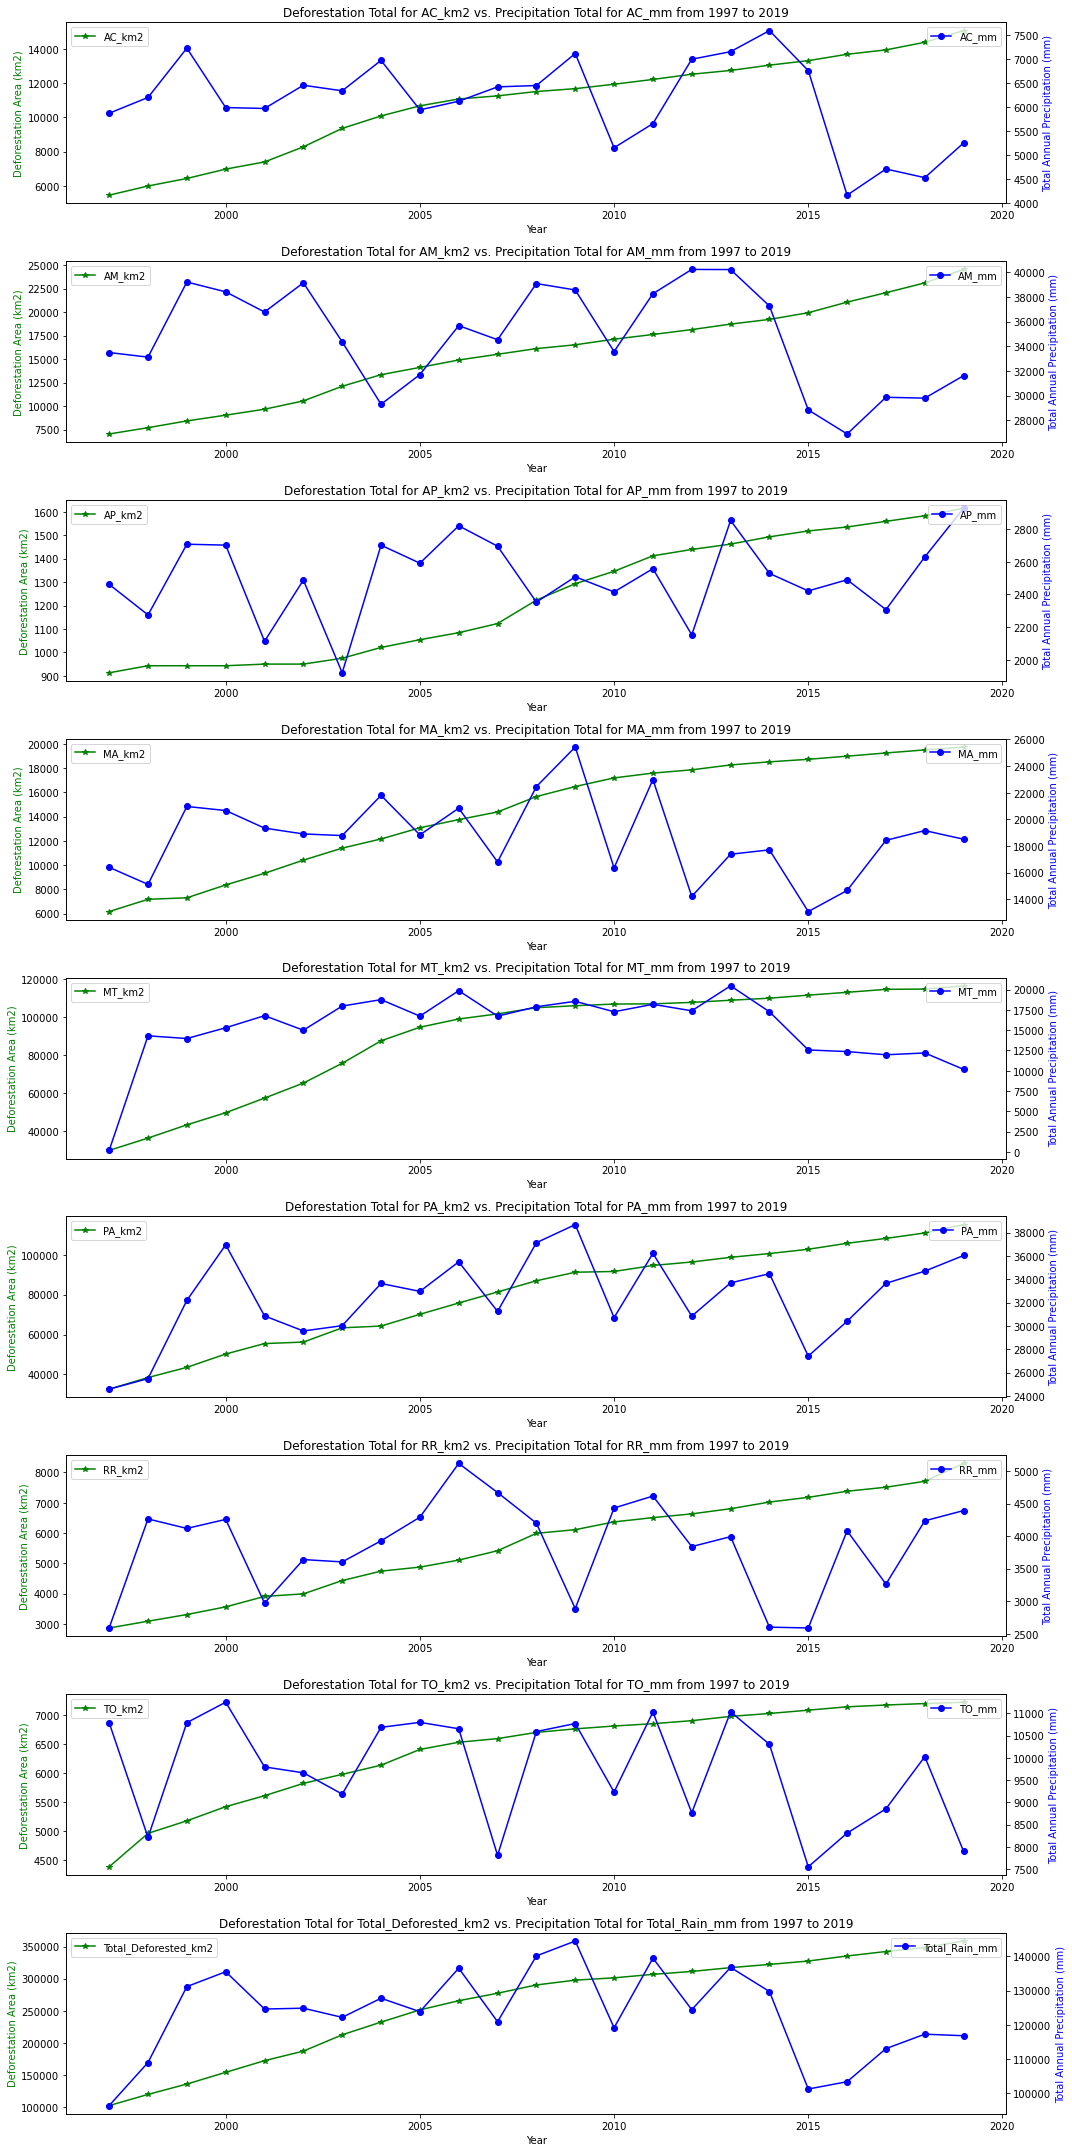

In [114]:
fig, axes =plt.subplots(9,sharex=False,sharey=False,figsize=(15,30))
for i, ax in enumerate(axes):
    ax1=axes[i]
    ax1.plot(x_axis,deforest_df[cols_deforest[i]],color="green",marker="*", label=f"{cols_deforest[i]}")#subplots=True,layout=(5,2),figsize=(20,15),ylabel="Deforested Area (km^2)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Deforestation Area (km2)", color="green")
    ax1.set_title(f"Deforestation Total for {cols_deforest[i]} vs. Precipitation Total for {cols_rain[i]} from 1997 to 2019")
    ax1.legend(loc="upper left")
    ax2=ax1.twinx()
    ax2.plot(x_axis,trp[cols_rain[i]], color ="blue", marker="o",label=f"{cols_rain[i]}")
    ax2.set_ylabel("Total Annual Precipitation (mm)", color = "blue")
    ax2.legend(loc="upper right")
    plt.tight_layout()
plt.show()